<font color='blue' size=30><b><h1>K-Means</h1></b></font>

<p> 
    O K-médias é um algoritmo de agrupamento iterativo que:
    Classifica objectos num determinado número prédefinido K de grupos (clusters). 
    Tem como função de classificação a distância do objecto ao centro do grupo (centróide).
</p>

<img src='k_means.jpg'>k-means</img>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import make_blobs

In [3]:
df = make_blobs(n_samples=200, n_features=2, centers=4)

In [4]:
df

(array([[-5.92428962e-02, -8.39997603e+00],
        [-3.68722448e+00, -9.33268351e+00],
        [-1.85422554e+00, -6.83378562e+00],
        [-2.01153217e+00, -9.00469976e+00],
        [ 3.76749692e-01,  4.86711440e+00],
        [ 2.45670973e+00,  4.77841913e+00],
        [ 2.01388094e+00,  2.35481367e+00],
        [-2.80060707e+00, -1.02413074e+01],
        [-3.00843221e+00, -8.98323203e+00],
        [-2.40529726e+00, -2.86434174e+00],
        [-3.63089186e+00, -9.13277091e+00],
        [-5.15242557e+00, -2.63520214e+00],
        [-2.69024556e+00, -9.51906428e+00],
        [ 1.04338222e+00,  6.11440799e+00],
        [ 1.02071098e+00,  4.39224738e+00],
        [-9.76788543e-01, -7.66573429e+00],
        [-3.45221843e+00, -7.51081291e+00],
        [ 1.83144111e+00,  2.78367061e+00],
        [-1.40319622e+00, -8.68012312e+00],
        [-4.14929091e+00, -2.03949885e+00],
        [-3.03373575e+00, -3.41538753e+00],
        [-4.80445033e+00, -2.85043011e+00],
        [-2.30651890e-03, -1.172

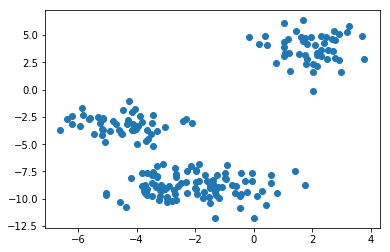

In [5]:
plt.scatter(df[0][:,0], df[0][:,1])

In [6]:
from sklearn.cluster import KMeans

In [7]:
model = KMeans(n_clusters=4)

In [8]:
model.fit(df[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
model.cluster_centers_

array([[-0.72164363, -9.02322347],
       [ 1.94225709,  3.79344415],
       [-4.4978951 , -3.23045333],
       [-3.10344055, -8.75218315]])

In [10]:
model.labels_

array([0, 3, 3, 3, 1, 1, 1, 3, 3, 2, 3, 2, 3, 1, 1, 0, 3, 1, 0, 2, 2, 2,
       0, 1, 1, 0, 0, 2, 2, 3, 3, 0, 3, 1, 0, 1, 1, 2, 0, 2, 1, 3, 1, 1,
       0, 3, 2, 2, 0, 0, 2, 2, 3, 0, 3, 0, 1, 1, 3, 3, 2, 1, 2, 3, 0, 1,
       3, 1, 1, 3, 2, 2, 0, 0, 0, 1, 2, 2, 0, 1, 2, 3, 2, 1, 1, 0, 0, 3,
       0, 2, 0, 0, 2, 1, 2, 0, 0, 3, 2, 0, 1, 3, 0, 0, 0, 1, 2, 2, 2, 1,
       2, 3, 1, 3, 0, 2, 3, 3, 3, 1, 3, 0, 1, 1, 2, 2, 3, 3, 1, 0, 2, 0,
       1, 0, 2, 1, 2, 3, 0, 3, 3, 3, 3, 1, 1, 2, 2, 3, 2, 1, 2, 2, 2, 3,
       2, 3, 3, 1, 2, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 0, 1, 1, 2, 3,
       2, 3, 3, 0, 3, 2, 3, 1, 3, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 2, 2, 0,
       0, 3])

Text(0.5, 1.0, 'Dados Originais')

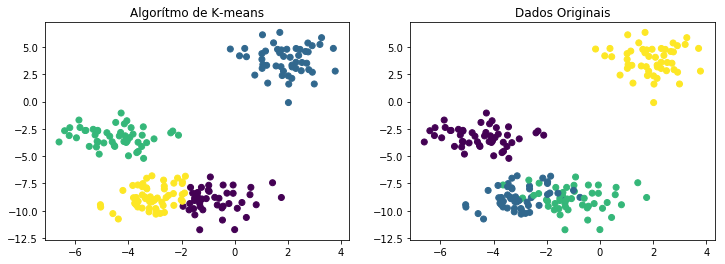

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))

ax1.scatter(df[0][:,0], df[0][:,1], c=model.labels_)
ax1.set_title('Algorítmo de K-means')

ax2.scatter(df[0][:,0], df[0][:,1], c=df[1])
ax2.set_title('Dados Originais')

**Exemplo 2 - K-Means com numpy**

In [30]:
from sklearn.datasets.samples_generator import make_blobs

In [31]:
centro = np.array([[0,0],[2.5,2.5]])

In [34]:
dados, label = make_blobs(n_samples=2000, centers=centro, n_features=2, random_state=2)

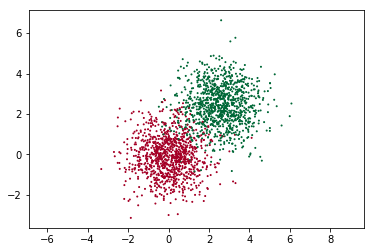

In [37]:
plt.scatter(dados[:,0], dados[:,1], s=1, c=label, cmap='RdYlGn')
plt.axis('equal')
plt.show()

In [44]:
def plot_progressao(dados, C, centros):
    plt.figure()
    plt.scatter(dados[:,0], dados[:,1], s=1, c=C, cmap='RdYlGn')
    plt.scatter(centros[:, 0], centros[:,1], s=50, c='k')
    plt.axis('equal')
    plt.show()

In [53]:
#Calcula a distância entre cada ponto aos centros
def kn_means(x, k, maxima_interacoes =10, plot_progressao=None):
    centros= x[np.random.choice(np.arange(len(x)),k)]
    for i in np.arange(maxima_interacoes):
        
        #Atribuição cluster step(E - step)
        c = np.array([np.argmin([np.square(np.linalg.norm(x_n -mu_j))
                               for mu_j in centros])
                     for x_n in x])
        if plot_progressao != None: plot_progressao(x, c, np.array(centros))
            
        #Mover os centros ao meio step (M - step)
        centros = [x[c == k].mean(axis=0) for k in np.arange(k)]
        if plot_progressao != None: plot_progressao(x, c, np.array(centros))
    return np.array(centros), c
                                

In [54]:
centros, c = kn_means(dados, 2, maxima_interacoes=5)

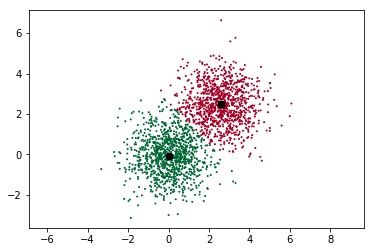

In [55]:
plot_progressao(dados, c, centros)

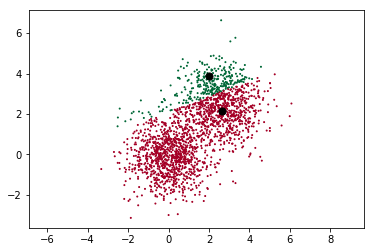

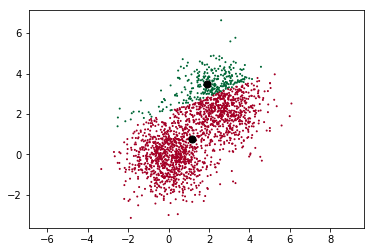

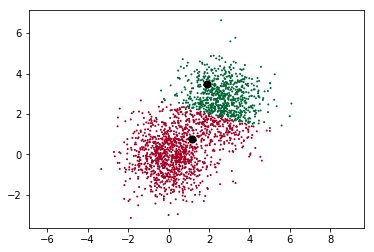

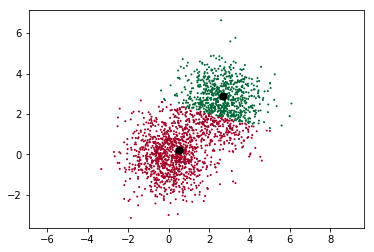

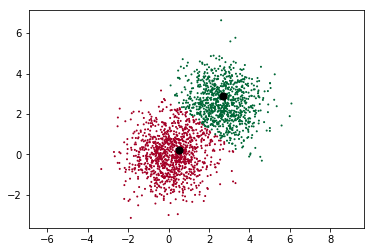

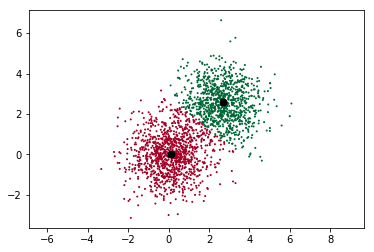

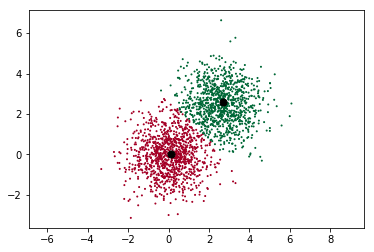

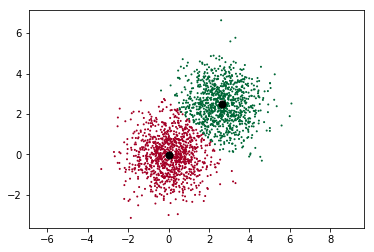

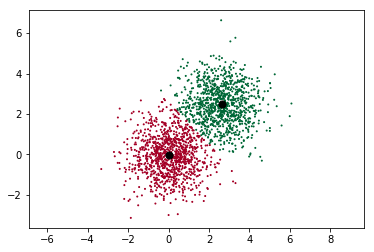

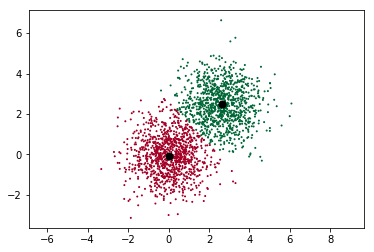

In [60]:
centros, c = kn_means(dados, 2, maxima_interacoes=5, plot_progressao=plot_progressao)

**Exemplo 3 - K-Means com a Biblioteca Sklearn**

In [61]:
model_1 = KMeans(n_clusters=2, random_state=0)

In [62]:
model_1.fit(dados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

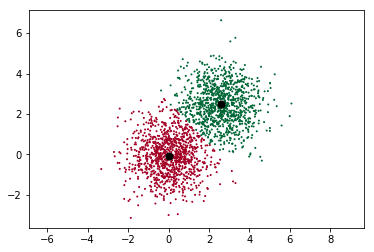

In [65]:
plt.figure()
plt.scatter(dados[:,0], dados[:,1], s=1, c=model_1.labels_, cmap='RdYlGn')
plt.scatter(model_1.cluster_centers_[:, 0], model_1.cluster_centers_[:,1], s=50, c='k')
plt.axis('equal')
plt.show()

In [74]:
model_2 = KMeans(n_clusters=2, init='k-means++', random_state=0)
model_2.fit(dados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

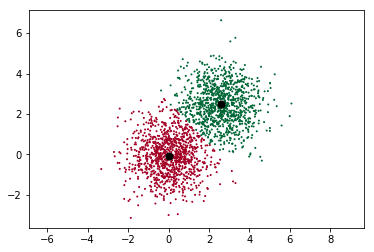

In [75]:
plt.figure()
plt.scatter(dados[:,0], dados[:,1], s=1, c=model_2.labels_, cmap='RdYlGn')
plt.scatter(model_2.cluster_centers_[:, 0], model_2.cluster_centers_[:,1], s=50, c='k')
plt.axis('equal')
plt.show()